In [3]:
!pip install pulp
from pulp import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 31.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# สำหรับสร้างแกนนอน แกนตั้ง
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    #ax.grid()
    return fig, ax

# **Optimizing profit function**

$$\pi = 40q - \dfrac{1}{2}q^2$$

ฺโดยการใช้แคลคูลัส เงื่อนไขลำดับที่หนึ่ง

$$\frac{d\pi}{dq} = 40 - q = 0$$

จะได้ $$q^* = 40 \text{ และ } \pi^* = 40(40) - \frac{1}{2}(40)^2 = 800$$

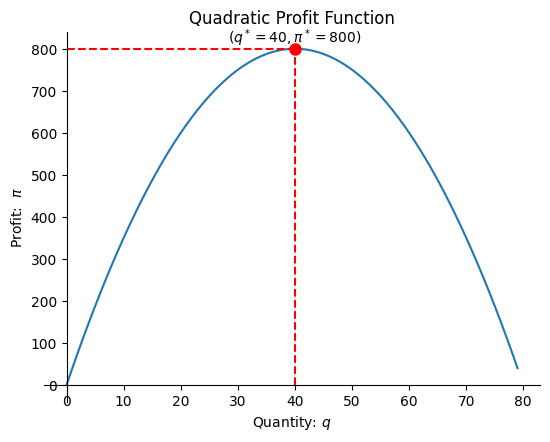

In [ ]:
def profit(q):
    return 40 * q - 0.5 * q**2

qs = np.arange(80)

#plt.plot(qs, profit(qs))
fig, ax = subplots()
ax.plot(qs, profit(qs))
plt.xlabel('Quantity: $q$')
plt.ylabel('Profit:  $\pi$')
plt.plot([40, 40], [0, 800], linestyle='--', color='r', drawstyle='steps-post')
plt.plot([0, 40], [800, 800], linestyle='--', color='r', drawstyle='steps-post')
plt.plot(40, 800, marker='o', markersize=8, color="red")
plt.text(40, 800, r'$(q^* = 40, \pi^* = 800)$', verticalalignment='bottom', horizontalalignment='center', color='black')
plt.title("Quadratic Profit Function")
plt.show()

# **Exhaustive search in Python**

In [ ]:
qs = np.arange(80)

def profit(q):
    return 40 * q - 0.5 * q**2

profits = profit(qs)
max_profit = profits.max()
max_ind = np.argmax(profits)
q_opt = qs[max_ind]

print(f"The quantity maximization is {q_opt}, which makes ${max_profit} profit.")

The quantity maximization is 40, which makes $800.0 profit.


### Exercise: *Applying an objective function*
You work for a media company and are faced with the problem of minimizing the cost to print and distribute magazines. You want to find the optimal number of magazines to publish and print for the smallest cost.

In your organization, the costs associated with a number of magazines printed is calculated using the following equation:

$$C = 50 + 5(q - 2)^2$$


The costs $C$ and quantity of magazines $q$
 are in thousands, so the `50` represents $50,000, the fixed costs of your business, such as paying the rent on the building.|

Instructions 1/2

1. Create a `numpy` array ranging from `0` to `10`; this represents the number of magazines printed.
2. Define a `cost()` function that computes the cost for a given quantity $q$  using the equation: $50 + 5(q - 2)^2$
.
3. Plot the cost, using the `cost()` function, to see where the optimum is.

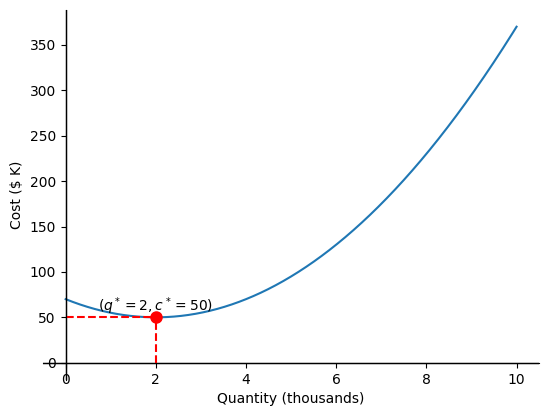

In [ ]:
# Create an array of integers from 0 to 10
quantity = np.linspace(0, 10, 1000)

# Define the cost function
def cost(q):
  return 50 + 5 * (q-2)**2

# Plot cost versus quantity
fig, ax = subplots()
ax.plot(quantity, cost(quantity))

plt.xlabel('Quantity (thousands)')
plt.ylabel('Cost ($ K)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)

plt.plot([2, 2], [0, 50], linestyle='--', color='r', drawstyle='steps-post')
plt.plot([0, 2], [50, 50], linestyle='--', color='r', drawstyle='steps-post')
plt.plot(2, 50, marker='o', markersize=8, color="red")
plt.text(2, 50, r'$(q^* = 2, c^* = 50)$', verticalalignment='bottom', horizontalalignment='center', color='black')

plt.show()

Instructions 2/2

*Question*

Review the plot and eye-ball the optimal quantity to minimize cost.

The lowest cost of $50,000 achieved with 2,000 magazines.

### Exercise: *Exhaustive search method*

You've applied the objective function and visualized the result; however, you could only eye-ball the optimal value by reviewing the plot. A more precise way of finding this value is with the exhaustive search method.

You're again working for a media company that publishes and prints magazines, but this time, you'll discover how to maximize profit rather than minimize cost. Recall that the profit and quantity units are in the thousands, so a `q` of `1` is 1,000 magazines and a profit of `5` is $5,000.

The same quantity array from the previous exercise has been provided for you, along with a `profit()` function to optimize.

```
def profit(q):
    return (10 * q - 25 - q**2) + 11
```

Instructions

1. Calculate the profit for every quantity using the `profit()` function provided, saving to `profits`.

2. Find the maximum profit with the appropriate array method, saving to `max_profit`.

3. Find the optimal quantity to maximize profit by saving the index of the maximum profit as `max_index`, then using this to subset `quantity`.

4. Print the results by completing the f-string, remembering to multiply the profit and quantity by `1000`.

In [ ]:
def profit(q):
    return (10 * q - 25 - q**2) + 11

quantity = np.arange(1, 10)

# Calculate the profit for every quantity
profits = profit(quantity)

# Find the maximum profit
max_profit = profits.max()

# Find the optimal quantity
max_profit_ind = np.argmax(profits)
optimal_quantity = quantity[max_profit_ind]

# Print the results
print(f"You need to print {1000 * optimal_quantity} magazines to make the maximum profit of ${1000 * max_profit}.")


You need to print 5000 magazines to make the maximum profit of $11000.


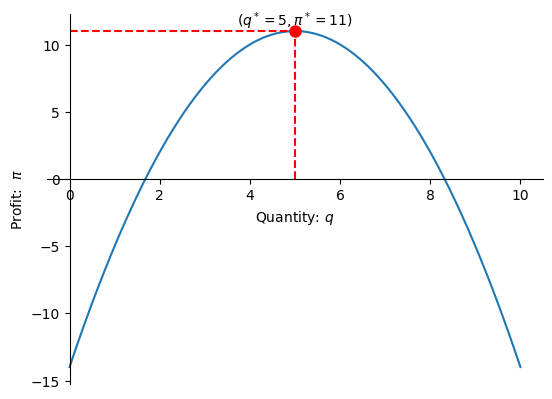

In [ ]:
fig, ax = subplots()
quantity = np.linspace(0, 10, 1000)
profits = profit(quantity)
ax.plot(quantity, profits)
plt.xlabel('Quantity: $q$')
plt.ylabel('Profit:  $\pi$')
plt.plot([5, 5], [0, 11], linestyle='--', color='r', drawstyle='steps-post')
plt.plot([0, 5], [11, 11], linestyle='--', color='r', drawstyle='steps-post')
plt.plot(5, 11, marker='o', markersize=8, color="red")
plt.text(5, 11, r'$(q^* = 5, \pi^* = 11)$', verticalalignment='bottom', horizontalalignment='center', color='black')
plt.show()

# **Calculating derivatives**

Objective function:
$$\pi = 40q - \frac{1}{2}q$$

Derivative: describes how the slope behaves

$$\frac{d\pi}{dq} = 40 - q$$

In [ ]:
from sympy import symbols, diff, solve

q = symbols('q')
P = 40 * q - 0.5 * q**2
dp_dq = diff(P)

print(f"The derivative is: {dp_dq}")

The derivative is: 40 - 1.0*q


Solve for the F.O.C.

In [ ]:
q_opt = solve(dp_dq)
print(f"Profit maximizing quantity: {q_opt[0]:.1f}")

Profit maximizing quantity: 40.0


Second order derivative

In [ ]:
d2p_dq2 = diff(dp_dq)
q_opt = solve(dp_dq)
sol = d2p_dq2.subs('q', q_opt[0])
print(f"The 2nd derivative is: {sol:.1f} < 0 ==> Maxima")

-1.00000000000000
The 2nd derivative is: -1.0 < 0 ==> Maxima


### Exercise: *Finding the derivative*

For some objective functions, the optimum can be found using calculus by finding the derivative of the function. `sympy` offers a solution to avoid manually calculating these derivatives. Suppose you work in a firm that produces toy bicycles. You have the following objective function to calculate your costs, $C$, which is dependent on the variable, $q$, the quantity of bicycles produced:

$$C = 2000 - q^2 + 120q$$

To find the optimum value of $q$, you'll find the derivative of the cost with respect to the quantity, $\frac{dC}{dq}$, using `sympy`.

Instructions

* Create a `sympy` symbol, `q`, that represents the quantity of bicycles produced.

* Find the derivative of the objective function `c` with respect to `q`, `dc_dq`, using `sympy`.

* Solve the derivative to find the optimum price.

In [ ]:
from sympy import symbols, diff, solve

# Convert q into a symbol
q = symbols('q')
c = 2000 - q**2 + 120 * q

# Find the derivative of the objective function
dc_dq = diff(c)
print(f"The derivative is {dc_dq}.")

# Solve the derivative
q_opt = solve(dc_dq)
print(f"Optimum quantity: {q_opt[0]:.1f}")

The derivative is 120 - 2*q.
Optimum quantity: 60.0


### *Find the second derivative*

Now that you have the derivative of your objective function, you can calculate the second order derivative. You'll do so symbolically using `sympy`.

The values for `dc_dq` and `q_opt`, and the objective function `c` with the quantity variable `q` from the previous exercise are available to you.

Instructions 1/2

1. Find the second derivative of `dc_dq`.
2. Substitute the optimum `q_opt` into the second derivative.

In [ ]:
# Find the second derivative
d2c_dq2 = diff(dc_dq)

# Substitute the optimum into the second derivative
sol = d2c_dq2.subs('q', q_opt[0])
print(f"The 2nd derivative at q_opt is: {sol}")

The 2nd derivative at q_opt is: -2


In [ ]:
diff(dc_dq)

-2

Question

You've found out that the second derivative at the critical point is `-2`. What does that indicate?

`-2` indicates a maxima

# **Solving multivariate problems**



In [ ]:
from sympy import symbols, diff, solve
K, L = symbols('K L')
F = K**(.34) * L**.66
dF_dK, dF_dL = diff(F, K), diff(F, L)
display(diff(F, K), dF_dL)

crit_points = solve([dF_dK, dF_dL], (K, L))
print(crit_points)

0.34*L**0.66/K**0.66

0.66*K**0.34/L**0.34

[]


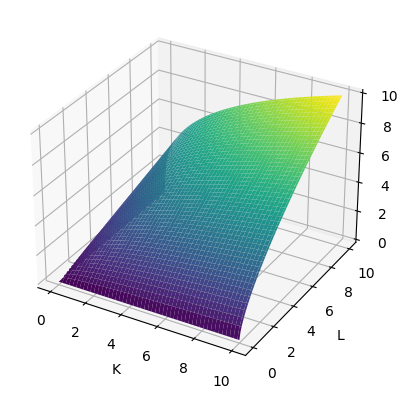

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def F(K, L):
    return K**0.34 * L**0.66

# Generate data points
K = np.linspace(0, 10, 100)
L = np.linspace(0, 10, 100)
K, L = np.meshgrid(K, L)
Z = F(K, L)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(K, L, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('K')
ax.set_ylabel('L')
ax.set_zlabel('F')
plt.show()

There is no max or min.  That was why sympy gave an empty list.

### Exercise: *Partial derivatives with SymPy*

You are an economist working for an automotive company. Your manager has modeled the production process as a function of the number of machines
$K$ and the number of workers $L$
 to produce

$$F = -3K^2 + 100K - \frac{1}{2}L^2 + 100L$$

 cars. This is your multivariate objective function. You'll need to use partial derivatives to optimize this function.

Instructions 1/3

Define the variables capital $(K)$
 and labor $(L)$
 as symbols.

In [ ]:
# Define symbols K, L
K, L = symbols('K L')

F = -3*K**2 + 100* K - (1/2)*L**2 + 100*L
F

-3*K**2 + 100*K - 0.5*L**2 + 100*L

Instructions 2/3

Derive the partial derivatives for each variable $K$ and $L$.

In [ ]:
dF_dK = diff(F, K)
dF_dL = diff(F, L)

display(dF_dK, dF_dL)

100 - 6*K

100 - 1.0*L

Instructions 3/3

Solve the two partial derivatives.

In [ ]:
# Solve the equations
crit_points = solve([dF_dK, dF_dL], (K, L))
print(crit_points)

{K: 16.6666666666667, L: 100.000000000000}


You found a critical point at $K$ of 16hrs 40min and an $L$ of 100hrs—this could be the function's optimum!

To be sure, you should visualize the function and look out for a special cases where differentiation breaks down.

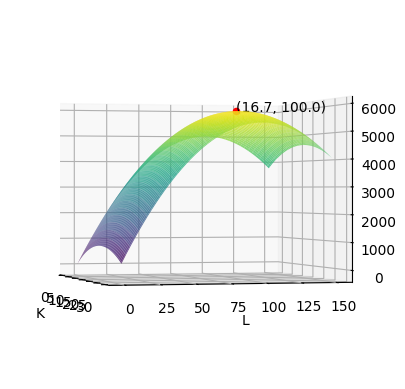

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def F(K, L):
    return -3*K**2 + 100* K - (1/2)*L**2 + 100*L

# Generate data points
K = np.linspace(0, 30, 100)
L = np.linspace(0, 150, 100)
K, L = np.meshgrid(K, L)
Z = F(K, L)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(K, L, Z, cmap='viridis', alpha=0.8)

# Add labels and title
ax.set_xlabel('K')
ax.set_ylabel('L')
ax.set_zlabel('F')

# Add marker at (16.6667, 100) and text
ax.scatter(16.7, 100, F(16.7, 100), color='red', alpha=1)
ax.text(16.7, 100, F(16.7, 100), "({:.1f}, {:.1f})".format(16.7, 100), color='black')
# Rotate the view
ax.view_init(elev=0, azim=-15)
plt.show()

# **Univariate unconstrained optimization**

\begin{align*}f(x) & = x^2 - 12x + 4\\
\frac{df(x)}{dx} & = 2x - 12\end{align*}

F.O.C.
\begin{align*}2x^* - 12 & = 0\\
x^* & = 6\\
f(x^*) & = 6^2 - 12(6) + 4 = -32\end{align*}

In [ ]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return x**2 - 12*x + 4

result = minimize_scalar(objective_function)
print(result)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -32.0
       x: 6.000000000000001
     nit: 4
    nfev: 9


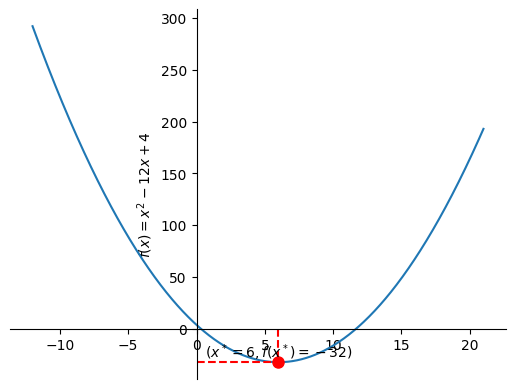

In [ ]:
xs = np.linspace(-12, 21, 1000)

#plt.plot(qs, profit(qs))
fig, ax = subplots()
ax.plot(xs, objective_function(xs))
plt.ylabel('$f(x) = x^2-12x+4$')
plt.plot([6, 6], [0, -32], linestyle='--', color='r', drawstyle='steps-post')
plt.plot([0, 6], [-32, -32], linestyle='--', color='r', drawstyle='steps-post')
plt.plot(6, -32, marker='o', markersize=8, color="red")
plt.text(6, -32, r'$(x^* = 6, f(x^*) = -32)$', verticalalignment='bottom', horizontalalignment='center', color='black')
plt.show()

In [ ]:
result.x

6.000000000000001

# **Finding the maxima**

$$\pi = 40q - \frac{1}{2}q^2$$

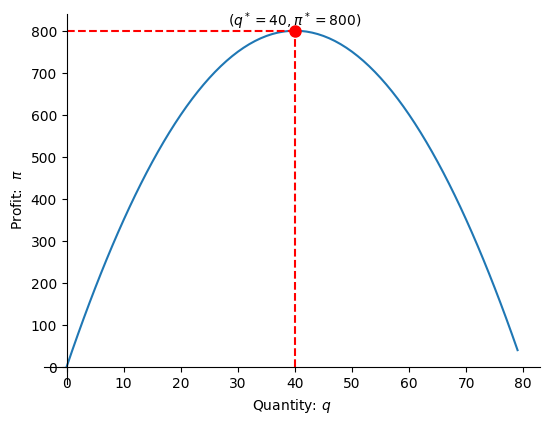

In [ ]:
def profit(q):
    return 40 * q - 0.5 * q**2

qs = np.arange(80)

#plt.plot(qs, profit(qs))
fig, ax = subplots()
ax.plot(qs, profit(qs))
plt.xlabel('Quantity: $q$')
plt.ylabel('Profit:  $\pi$')
plt.plot([40, 40], [0, 800], linestyle='--', color='r', drawstyle='steps-post')
plt.plot([0, 40], [800, 800], linestyle='--', color='r', drawstyle='steps-post')
plt.plot(40, 800, marker='o', markersize=8, color="red")
plt.text(40, 800, r'$(q^* = 40, \pi^* = 800)$', verticalalignment='bottom', horizontalalignment='center', color='black')
plt.show()

In [ ]:
# ต้องทำเป็นลบก่อน

def negative_profit_function(q):
    return -40* q +0.5* q**2

result = minimize_scalar(negative_profit_function)
print(f"The maximum is {result.x:.1f}")

The maximum is 40.0


# **Multivariate unconstrained optimization**

\begin{align*} f(x_1, x_2) & = (x_1-2)^2 + (x_2-3)^2 + 1.5\\
\frac{\partial f}{\partial x_1} & = 2(x_1-2)\\
\frac{\partial f}{\partial x_2} & = 2(x_2-3)\end{align*}

แก้เงื่อนไขลำดับที่หนึ่งจะได้

$$x_1^* = 2, x_2^* = 3$$

Hessian matrix

$$|H| = \left|\begin{array}{cc}\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y}\\ \frac{\partial^2 f}{\partial x \partial y} & \frac{\partial^2 f}{\partial y^2}\end{array} \right| = \left|\begin{array}{cc}2 & 0\\ 0& 2 \end{array} \right|$$

In [ ]:
from sympy import symbols, hessian

# Define symbols
x, y = symbols('x y')

# Define a multivariate function
f = (x - 2)**2 + (y - 3)**2 + 1.5

# Calculate the Hessian matrix
H = hessian(f, (x, y))
print(H)

Matrix([[2, 0], [0, 2]])


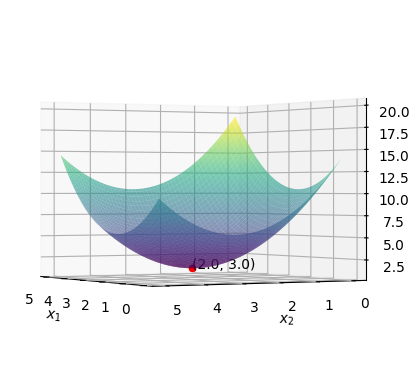

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def F(x1, x2):
    return (x1 - 2)**2 + (x2 - 3)**2 + 1.5

# Generate data points
x1 = np.linspace(0, 5, 100)
x2 = np.linspace(0, 5, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = F(x1, x2)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(x1, x2, Z, cmap='viridis', alpha=0.6)

# Add labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')

# Add marker at (16.6667, 100) and text
ax.scatter(2, 3, F(2, 3), color='red', alpha=1)
ax.text(2, 3, F(2, 3), "({:.1f}, {:.1f})".format(2, 3), color='black')
# Rotate the view
ax.view_init(elev=0, azim=150)
plt.show()

ฟังก์ชัน `scipy.optimize.minimize` ต้องใช้ตัวแปรในรูปเวคเตอร์ จึงต้องใช้ `a[0]`, `a[1]` แทน `x0`, `x1` โดย

$$a_0 = x$$
$$a_1 = y$$

In [ ]:
from scipy.optimize import minimize

def objective_function(a):
    # a[0] represents x and a[1] represents y
    return (a[0] - 2)**2 + (a[1] - 3)**2 + 1.5

# Intitial Guess
x0 = [1, 2]
result = minimize(objective_function, x0)
print(result, "\n")
print(f"minimum is (x, y) = ({result.x[0]:.1f}, {result.x[1]:.1f}).")

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.5000000000000002
        x: [ 2.000e+00  3.000e+00]
      nit: 2
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 7.500e-01 -2.500e-01]
            [-2.500e-01  7.500e-01]]
     nfev: 9
     njev: 3 

minimum is (x, y) = (2.0, 3.0).


?? ทำไม Hessian ออกมาเป็น $ \left|\begin{array}{cc}0.75 & -0.25\\ -0.25& 0.75 \end{array} \right|$ ??

### Exercise: *Finding the maxima*

Unconstrained optimization is finding the maxima or minima of a function that does not have any constraints or restrictions on the input variables.

Suppose you are launching a new product in your delicious cookie company and you want to maximize the revenue. The revenue can be modeled with this objective function where `R` is the revenue generated at price `x`.

$$R = -x^2 + 3x - 5$$

Solve this maximization problem using SciPy.

Instructions

* Define a new objective function that is the negative of the original objective function.
* Maximize the negative function.
* Print the optimal value to two decimal places.

In [ ]:
from scipy.optimize import minimize_scalar

# Define the new objective function
def negated_function(x):
  return x**2 - 3*x + 5

# Maximize the negated function
result = minimize_scalar(negated_function)

# Print the result
print(f"The maximum is {result.x:.2f} in two decimals.")

The maximum is 1.50 in two decimals.


### Exercise: *Multivariate optimization*

Great job maximizing that revenue! You now want to look at minimizing costs.

You'll need to consider two variables for your new cookie product, the sugar ingredient (`a[0]`) and the flour ingredient (`a[1]`). This is a multivariate optimization problem where you want to find the best way to mix these ingredients so that your cookies are delicious but not too expensive!

Instructions

* Save your initial guess to `x0`; this can be anything!

* Calculate and print the minimum.

In [ ]:
from scipy.optimize import minimize

def objective_function(a):
    return (a[0] - 2)**2 + (a[1] - 3)**2 + 3

# Save your initial guess
x0 = [0, 0]

# Calculate and print the minimum
result = minimize(objective_function, x0)
print(f"minimum is (x, y) = ({result.x[0]:.2f}, {result.x[1]:.2f}) in two decimals.")

minimum is (x, y) = (2.00, 3.00) in two decimals.


# **Bound constrained optimization**

* The constraint is a range
* Produce between 50 and 100 units per day

In [ ]:
from scipy.optimize import Bounds

# For 1 variable
bounds = Bounds(50, 100)

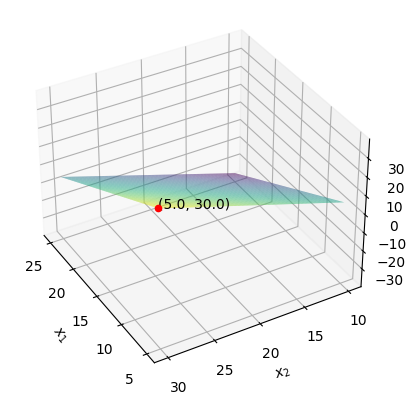

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def F(x1, x2):
    return -2*x1 + 1.5*x2

# Generate data points
x1 = np.linspace(5, 25, 100) # bound between 5 and 25
x2 = np.linspace(10, 30, 100) # bound between 10 and 30
x1, x2 = np.meshgrid(x1, x2)
Z = F(x1, x2)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(x1, x2, Z, cmap='viridis', alpha=0.6)

# Add labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')

# Add marker at (16.6667, 100) and text
ax.scatter(5, 30, F(5, 30), color='red', alpha=1)
ax.text(5, 30, F(5, 30), "({:.1f}, {:.1f})".format(5, 30), color='black')
# Rotate the view
ax.view_init(elev=35, azim=150)
plt.show()

In [ ]:
from scipy.optimize import minimize, Bounds

def neg_objective_function(b):
    # Find the maximum: negative of objective function
    return 2*b[0] - 1.5*b[1]

# b0 between 5 and 25, b1 between 10 and 30
bounds = Bounds([5, 10], [25, 30]) # LB, UB
x0 = [10, 5]

result = minimize(neg_objective_function, x0, method='L-BFGS-B', bounds=bounds)
print(result.x)

[ 5. 30.]


# **Solve a linear constrained problem**

(Let us ignore Kuhn-Tucker conditions for now)

$$\min_{x, y} x^2 + y^{\frac{1}{2}}$$

subject to

$$2x + 3y \leq 6$$

$$L = x^2 + y^{\frac{1}{2}} + \lambda (6-2x-3y) $$

F.O.C.s

\begin{align}
\frac{\partial L}{\partial x} & = 2x -2\lambda = 0\\
\frac{\partial L}{\partial y} & = \frac{1}{2y^{\frac{1}{2}}} - 3 \lambda = 0\\
\frac{\partial L}{\partial \lambda} & = 6 - 2x - 3y = 0
\end{align}

Solving the above
\begin{align}
4xy^{\frac{1}{2}} & = \frac{2}{3}\\
x & = \frac{1}{6y^{\frac{1}{2}}}\\
\frac{1}{3y^{\frac{1}{2}}} + 3y & = 6\\
1 + 9y^{\frac{3}{2}} & = 18y^{\frac{1}{2}}
\end{align}

Using nonlinear equation solver below yields $$x^* = 0.1203, y^* = 1.9198$$




In [ ]:
from scipy.optimize import fsolve
import numpy as np

# Define the function whose roots we want to find
def equation(y):
    return 1/(3*y**(0.5)) + 3*y - 6

# Initial guess
initial_guess = 2.0

# Solve the equation
solution = fsolve(equation, initial_guess)
x = 1/6/solution[0]**(0.5)
print(f"x = {x:.4f}, y = {solution[0]:.4f}")

x = 0.1203, y = 1.9198


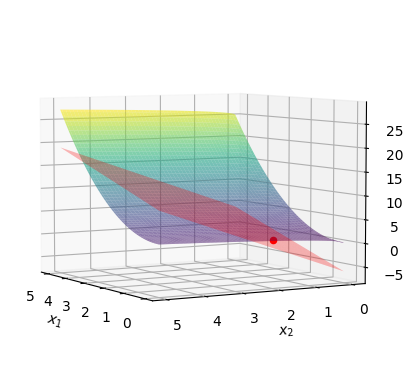

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x1, x2):
    return x1**2 + x2**0.5
def constraint_function(x1, x2):
    return 2*x1 + 3*x2 - 6

# Generate data points
x1 = np.linspace(0, 5, 100) # bound between 5 and 25
x2 = np.linspace(0, 5, 100) # bound between 10 and 30
x1, x2 = np.meshgrid(x1, x2)
Z1 = objective_function(x1, x2)
Z2 = constraint_function(x1, x2)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(x1, x2, Z1, cmap='viridis', alpha=0.6)
#Z2[Z2 > 0] = np.nan  # Masking the values greater than 0
ax.plot_surface(x1, x2, Z2, color='red', alpha=0.3)

# Add labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')

# Add marker at (16.6667, 100) and text
ax.scatter(0.12028576, 1.9198095, objective_function(0.12028576, 1.9198095), color='red', alpha=1)
#ax.text(5, 30, F(5, 30), "({:.1f}, {:.1f})".format(5, 30), color='black')
# Rotate the view
ax.view_init(elev=5, azim=150)
plt.show()

In [ ]:
from scipy.optimize import minimize

def objective_function(b):
    return (b[0]) ** 2 + (b[1]) ** 0.5
def constraint_function(x):
    return 2*x[0] + 3*x[1] - 6

# type = eq for equality constraint
constraint = {'type': 'ineq', 'fun': constraint_function}

# Guess
x0 = [20, 20]

result = minimize(objective_function, x0, constraints=[constraint])
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.4000405780533618
       x: [ 1.202e-01  1.920e+00]
     nit: 6
     jac: [ 2.403e-01  3.609e-01]
    nfev: 19
    njev: 6


### Exercise: *Working with Bounds*

Bound-constrained problems have variables that are limited to a range of values.

You're running a coffee shop and need to place an order for two varieties of coffee beans: `b[0]` and `b[1]`. You want to minimize costs. Your supplier only accepts minimum quantity orders of 2 units for each bean, and you can afford a maximum of 100 units per bean.

Instructions

* Set the lower and upper bound values for `b[0]` and `b[1]` as `bounds`.
* Use `scipy` to find the minimum.

In [ ]:
from scipy.optimize import minimize, Bounds

def objective_function(b):
    return (b[0] - 6)**2 + (b[1] - 8)**2 + 3

# Set the bounds of your problem
bounds = Bounds([2, 2], [100, 100])

x0 = [10, 5]

# Find the minimum
result = minimize(objective_function, x0, method='L-BFGS-B', bounds=bounds)

print(result.x)

[6.         7.99999999]


### Exercise: *Handling hard inequalities*

Back in the coffee shop, you want to look at minimizing daily expenses. You have an objective function that calculates your production costs, and a constraint function that tells you the limits of how much coffee you can produce.

Apply `scipy` to find the optimal allocation of resources to minimize costs.

Instructions

* Set the `constraint` variable using a dictionary.
* Apply `scipy` to find the optimal value.

In [ ]:
from scipy.optimize import minimize, Bounds

def objective_function(b):
  return (b[0] - 5) ** 2 + (b[1] - 3) ** 3

def constraint_function(x):
    return 2*x[0] + 3*x[1] - 6

# Set the constraint variable
constraint = {'type': 'ineq', 'fun': constraint_function}

x0 = [20, 20]

# Find the minimum
result = minimize(objective_function, x0, constraints=[constraint])

print(result)

 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: -5596424370440672.0
       x: [ 2.665e+05 -1.775e+05]
     nit: 3
     jac: [ 0.000e+00  9.456e+10]
    nfev: 9
    njev: 3


THIS DOES NOT CONVERGE!!!  LOOKS LIKE WE HAVE A SADDLE POINT.

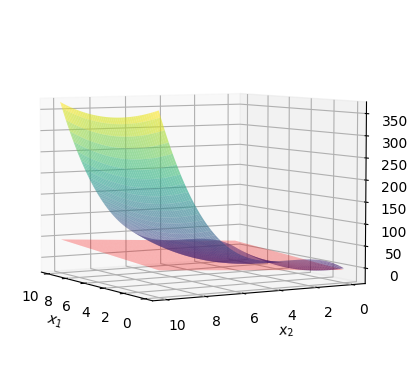

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x1, x2):
    return (x1 - 5) ** 2 + (x2 - 3) ** 3
def constraint_function(x1, x2):
    return 2*x1 + 3*x2 - 6

# Generate data points
x1 = np.linspace(0, 10, 100) # bound between 5 and 25
x2 = np.linspace(0, 10, 100) # bound between 10 and 30
x1, x2 = np.meshgrid(x1, x2)
Z1 = objective_function(x1, x2)
Z2 = constraint_function(x1, x2)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(x1, x2, Z1, cmap='viridis', alpha=0.6)
#Z2[Z2 > 0] = np.nan  # Masking the values greater than 0
ax.plot_surface(x1, x2, Z2, color='red', alpha=0.3)

# Add labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')

# Add marker at (16.6667, 100) and text
#ax.scatter(0.12028576, 1.9198095, objective_function(0.12028576, 1.9198095), color='red', alpha=1)
#ax.text(5, 30, F(5, 30), "({:.1f}, {:.1f})".format(5, 30), color='black')
# Rotate the view
ax.view_init(elev=5, azim=150)
plt.show()

# **Linear Programming**
## **Product mix**

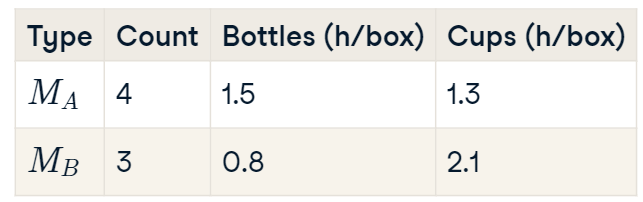

* The company has 4 of machine A and 3 of machine B.
* Each machine operates for 30 hours per week
* Demand: bottles for drinks, cups for yogurt

## **Maximize Profit**

* Profit per box

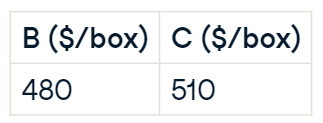

* $B$ is amount of bottles and $C$ is number of cups.
* Objective function 480$B$ + 510$C$
* Constraints
  * Machine A: $1.5B + 1.3C \leq 4\times30$
  * Machine B: $0.8B + 2.1C \leq 3\times30$
  * Non-negativity constraint: $B, C ≥ 0$

  # **Using PuLP**

  ```
  pulp.LpProblem('MaxProfit', LpMaximize)
  ```
  * `'MaxProfit'` = name for your problem
  * LpMaximize (LpMinimize) = method

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 30.4 MB/s eta 0:00:00


In [ ]:
from pulp import *

model = LpProblem('ProductMix', LpMaximize)

B = LpVariable('B', lowBound=0)
C = LpVariable('C', lowBound=0)

model += 480*B + 510*C
model += 1.5*B + 1.3*C <= 120, "M_A"
model += 0.8*B + 2.1*C <= 90, "M_B"

# **PuLP model output**

In [ ]:
print(model)

ProductMix:
MAXIMIZE
480*B + 510*C + 0
SUBJECT TO
M_A: 1.5 B + 1.3 C <= 120

M_B: 0.8 B + 2.1 C <= 90

VARIABLES
B Continuous
C Continuous



In [ ]:
from pulp import *

model = LpProblem('ProductMix', LpMaximize)
B = LpVariable('B', lowBound=0)
C = LpVariable('C', lowBound=0)
model += 480*B + 510*C
model += 1.5*B + 1.3*C <= 120, "M_A"
model += 0.8*B + 2.1*C <= 90, "M_B"

print(model)

ProductMix:
MAXIMIZE
480*B + 510*C + 0
SUBJECT TO
M_A: 1.5 B + 1.3 C <= 120

M_B: 0.8 B + 2.1 C <= 90

VARIABLES
B Continuous
C Continuous



# **Solving with PuLP**

If the value of `status` is 1, then we have a solution.

In [ ]:
status = model.solve()
print(status)

1


In [ ]:
print(f"Profit = {value(model.objective):.2f}")
print(f"Tons of bottles = {B.varValue:.2f}, tons of cups = {C.varValue:.2f}")

Profit = 40137.44
Tons of bottles = 63.98, tons of cups = 18.48


# **Handling multiple variables and constraints**

In [ ]:
variables = LpVariable.dicts("Product", ['B', 'C'], lowBound=0)

OR

In [ ]:
variables = LpVariable.dicts("Product", range(2), 0)

In [ ]:
box_profit = {'B': 480, 'C': 510}
variables = LpVariable.dicts("Product", ['B', 'C'], lowBound=0)

model2 = LpProblem('ProductMix', LpMaximize)
model2 += lpSum([box_profit[i] * variables[i] for i in ['B', 'C']])
model2 += 1.5*variables['B'] + 1.3*variables['C'] <= 120, "M_A"
model2 += 0.8*variables['B'] + 2.1*variables['C'] <= 90, "M_B"

print(model2)

ProductMix:
MAXIMIZE
480*Product_B + 510*Product_C + 0
SUBJECT TO
M_A: 1.5 Product_B + 1.3 Product_C <= 120

M_B: 0.8 Product_B + 2.1 Product_C <= 90

VARIABLES
Product_B Continuous
Product_C Continuous



In [ ]:
status = model2.solve()
print(f"Profit = {value(model2.objective):.2f}")
print(f"Tons of bottles = {variables['B'].varValue:.2f}, tons of cups = {variables['C'].varValue:.2f}")

Profit = 40137.44
Tons of bottles = 63.98, tons of cups = 18.48


### Exercise: *PuLP for linear optimization*

A farmer faces a diet problem for their cattle. The vet's recommendation is that each animal is fed at least 7 pounds of a mix of corn and soybean with at least 17% protein and 2% fat. Below are the relevant nutritional elements:

```
Food type	Cost ($/lb)	Protein (%)	Fat (%)
corn	      0.11	       10	        2.5
soybean	    0.28	      40	         1
```
You will use this information to minimize costs subject to nutritional constraints.

Instructions 1/2

* Define a model for minimization called `"MinCost"`.
* Define the variables for corn (`"C"`) and soybean (`"S"`) and make sure they are non-negative.


In [ ]:
# Define the model
model = LpProblem("MinCost", LpMinimize)

C = LpVariable('C', lowBound=0)
S = LpVariable('S', lowBound=0)

Instructions 2/2

* Add the objective function and constraints to the model using the vet's recommendations.
* Solve the model.

In [ ]:
# Define the model
model = LpProblem("MinCost", LpMinimize)

# Define the variables
C = LpVariable("C", lowBound=0)
S = LpVariable("S", lowBound=0)

# Add the objective function and constraints
model += 0.11*C + 0.28*S
model += 40*S + 10*C >= 17*(C+S), "M_protein" #ไม่ค่อยเข้าใจตรงนี้
model += S + 2.5*C >= 2*(C+S), "M_fat"
model += C + S >= 7, "M_weight"

# Solve the model
model.solve()
print(f"Cost = {value(model.objective):.2f}")
print(f"Pounds of soybean = {S.varValue:.2f}, pounds of corn = {C.varValue:.2f}")

Cost = 1.05
Pounds of soybean = 1.63, pounds of corn = 5.37


###  Exercise: *Handling multiple elements*

The farmer wants to replicate the previous optimization function to detail with more complicated meals for other animals on the farm.

The previous code has been provided. Can you adjust the previous code to make it better at handling multiple variables?

Instructions

* Adjust the variable definition to use `LpVariable.dicts()`, saving them as `variables` with the name `"Food"`.

* Adjust the objective function to use `lpSum()`.

In [ ]:
model = LpProblem("MinCost", LpMinimize)

# Adjust the variable definition
variables = LpVariable.dicts("Food", ['C', 'S'], lowBound=0)

# Adjust the objective function
cost = {'C': 0.11, 'S': 0.28}
model += lpSum([cost[i] * variables[i] for i in ['C', 'S']])

model += 40*variables['S'] + 10*variables['C'] >= 17*(variables['C']+variables['S']), "M_protein"
model += variables['S'] + 2.5*variables['C'] >= 2*(variables['C']+variables['S']), "M_fat"
model += variables['C'] + variables['S'] >= 7, "M_weight"

model.solve()
print(f"Cost = {value(model.objective):.2f}")
print(f"Pounds of soybean = {variables['S'].varValue:.2f}, pounds of corn = {variables['C'].varValue:.2f}")

Cost = 1.05
Pounds of soybean = 1.63, pounds of corn = 5.37


# **Indifference Curves**

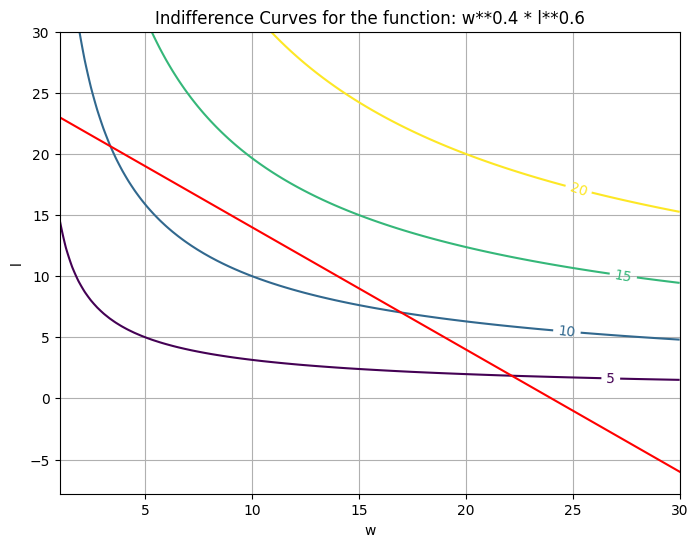

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(1, 30, 100)
l = np.linspace(1, 30, 100)
W, L = np.meshgrid(w, l)
F = W**0.4 * L**0.6

l = 24-w

plt.figure(figsize=(8, 6))
contours = plt.contour(W, L, F, levels=[5, 10, 15, 20])
plt.clabel(contours)
plt.title('Indifference Curves for the function: w**0.4 * l**0.6')
plt.xlabel('w')
plt.ylabel('l')
plt.grid(True)
plt.plot(w, l, color='red')
plt.show()

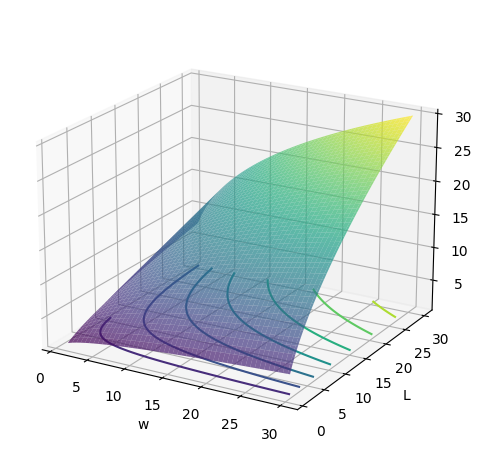

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def F(W, L):
    return W**0.4 * L**0.6

# Generate data points
Z = F(W, L)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(W, L, Z, cmap='viridis', alpha=0.7)

# Plot contour lines projected on the surface
contour = ax.contour(W, L, Z, zdir='z', offset=np.min(Z), cmap='viridis')

# Add labels and title
ax.set_xlabel('w')
ax.set_ylabel('L')
ax.set_zlabel('F')
# Rotate the view
ax.view_init(elev=20, azim=-60)
plt.tight_layout()
plt.show()

# **Utility maximization problem**

$$\max_{w, l}w^{\frac{2}{5}}l^{\frac{3}{5}}$$

subject to

$$w + l = 24$$

\begin{align}U & = w^{\frac{2}{5}}(24-w)^{\frac{3}{5}} \\
\log U & = \frac{2}{5}\log w + \frac{3}{5}\log (24-w)\\
\frac{d \log U}{dw} & = \frac{2}{5w} - \frac{3}{5(24-w)}\\
10(24-w) & = 15w\\
240 & = 25w\\
w^* & = \frac{240}{25} = 9\frac{3}{5} = 9.6\\
l^* & = 24 - 9\frac{3}{5} = 14\frac{2}{5} = 14.4
\end{align}

# **Solving with SciPy**

In [ ]:
from scipy.optimize import minimize

def utility_function(vars):
    w, l = vars
    return -(w**0.4 * l**0.6)

def constraint(vars):
    return 24 - np.sum(vars)

initial_guess = [12, 12]
constraint_definition = {'type': 'eq', 'fun': constraint}
result = minimize(utility_function, initial_guess, constraints=constraint_definition)
print(result.x)

[ 9.60001122 14.39998878]


### Exercise: *Visualize the indifference curve*

You have been provided the following utility function and constraint.
$$U(c, m)=c^{0.7}m^{0.3}$$

$$c+m=2$$
Use this to visualize the indifference curve.

Instructions

* Define the constraint as `m` and generate the combinations of `c` and `m`.
* Define the utility function and assign it to `F`.
* Plot the contours and constraint.

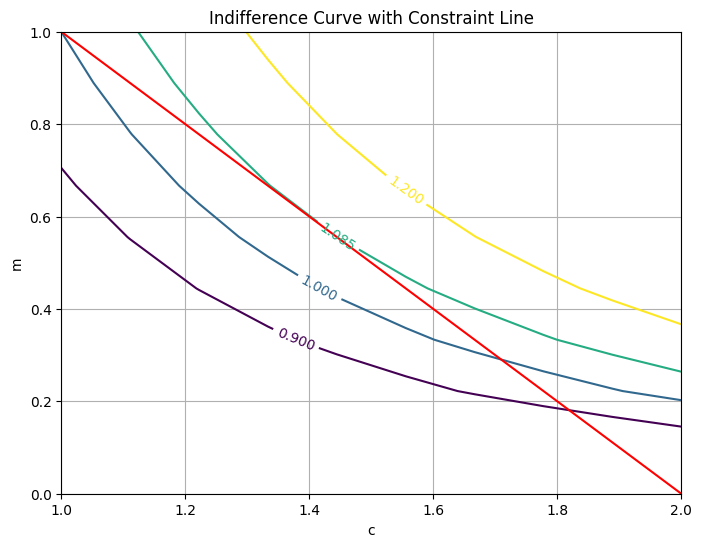

In [ ]:
c = np.linspace(1, 2, 10)
# Define the constraint and generate combinations
m = 2-c
C, M = np.meshgrid(c, m)
# Define the utility function
F = C**(0.7)*M**(0.3)

plt.figure(figsize=(8, 6))
# Plot the controls and constraints
contours = plt.contour(C, M, F, levels=[0.9, 1.00, 1.085, 1.2])
plt.clabel(contours)
plt.plot(c, m, color='red')
plt.title('Indifference Curve with Constraint Line')
plt.xlabel('c')
plt.ylabel('m')
plt.grid(True)
plt.show()

### Exercise: *Utility maximization*

Bill is an aspiring piano student who allocates hours of study in classical $c$ and modern $m$ music. His preferences are represented by the same utility function you just plotted:

$$U(c, m)=c^{0.7}m^{0.3}$$

Hours of study sum up to $2 (c+m=2)$ daily. Help Bill find the optimal studying plan.

`np` and `minimize` have been loaded for you. We have already imported `symbols`, `diff` and `solve` from `SymPy`, defined `c` and `m` as symbols and defined the Utility function `U` for you.

่ไม่เห็นได้ใช้ ???

Instructions

* Define the utility function by unpacking `vars` and returning the negated function.
* Define the constraint function.
* Set up the constraint with `type` and `fun`.
* Perform optimization and extract the results for `c` and `m`.

In [ ]:
from scipy.optimize import minimize

# Define the utility function
def utility_function(vars):
    c, m = vars
    return -(c**0.7 * m**0.3)

# Define the constraint function
def constraint(vars):
    return 2 - np.sum(vars)

initial_guess = [12, 12]

# Set up the constraint
constraint_definition = {'type': 'eq', 'fun': constraint}

# Perform optimization
result = minimize(utility_function, initial_guess, constraints=constraint_definition)
c, m = result.x

print("Optimal study hours for classical music:", round(c, 2))
print("Optimal study hours for modern music:", round(m, 2))

Optimal study hours for classical music: 1.4
Optimal study hours for modern music: 0.6


# **Corner versus interior solution**

* Cannot work more than 5 hours
* Two constraints

   * $w \leq 5$
   * $l + w \leq 24$

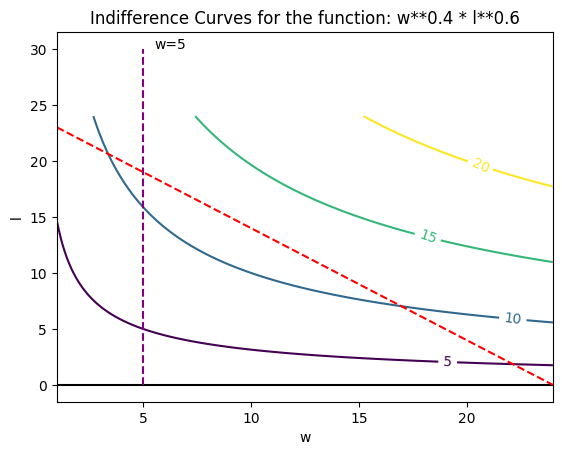

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(1, 24, 100)
l = np.linspace(1, 24, 100)
W, L = np.meshgrid(w, l)
F = W**0.4 * L**0.6

l = 24-w

contours = plt.contour(W, L, F, levels=[5, 10, 15, 20])
plt.clabel(contours)

plt.axhline(y=0, color='black', linestyle='-')
plt.plot([5, 5], [0, 30 ], color='purple', linestyle='--')

plt.annotate('w=5', xy=(5, 0.05), xytext=(5.5, 30))

plt.title('Indifference Curves for the function: w**0.4 * l**0.6')
plt.xlabel('w')
plt.ylabel('l')
plt.plot(w, l, color='red', linestyle='--')
plt.show()

# **Manufacturer with capacity constraints**

Automaker produces identical cars in two
plants A, B

- Quantities: $q_A , q_B$
- Capacity: $q_A ≤ 90, q_B ≤ 90$
- Cost: $C (q) = 3q, C (q) = 3.5q$

Demand:
- $P = 120 − Q$
- Contract: $Q ≥ 92$

Objective to maximize profit:
$$\max_{q_A, q_B} Π(q_A , q_B ) = [120 - (q_A+q_B)](q_A+q_B)]-3q_A-3.5q_B$$

subject to

\begin{align}
0 & \leq q_A, q_B\leq 90\\
92 & \leq q_A + q_B
\end{align}



In [2]:
from scipy.optimize import minimize, Bounds, LinearConstraint

def R(q):
    return -((120 - (q[0] + q[1])) * (q[0] + q[1]) - 3*q[0] - 3.5*q[1])

# [0, 0] are lowerbounds of q_A, q_B
bounds = Bounds([0, 0], [90, 90])

# lb is lowerbound
constraints = LinearConstraint([1, 1], lb=92) # [1, 1] คือสัมประสิทธิ์หน้า q_A, q_B

# [50, 50] is initial guess
result = minimize(R, [50, 50], bounds=bounds, constraints=constraints)
print(result.message)
print(f'The optimal number of cars produced in plant A is: {result.x[0]:.2f}')
print(f'The optimal number of cars produced in plant B is: {result.x[1]:.2f}')
print(f'The firm made: ${-result.fun:.2f}') # ใส่เครื่องหมายลบเพื่อคืนค่า

Optimization terminated successfully
The optimal number of cars produced in plant A is: 90.00
The optimal number of cars produced in plant B is: 2.00
The firm made: $2299.00


# **Non-linear contraints in SciPy**



In [4]:
from scipy.optimize import NonlinearConstraint

constraints = NonlinearConstraint(lambda q: q[0] + q[1], lb=92, ub=np.Inf)

result = minimize(R, [50, 50], bounds=Bounds([0, 0], [90, 90]), constraints=constraints)

print(result.message)
print(f'The optimal number of cars produced in plant A is: {result.x[0]:.2f}')
print(f'The optimal number of cars produced in plant B is: {result.x[1]:.2f}')
print(f'The firm made: ${-result.fun:.2f}')

Optimization terminated successfully
The optimal number of cars produced in plant A is: 90.00
The optimal number of cars produced in plant B is: 2.00
The firm made: $2299.00


### Exercise: *Linear constrained biscuits*

You now have two bakeries, $A$  and $B$.

Your bakeries can each make `100` biscuits a day and the cost of making a biscuit in bakery $A$ is 1.5$q$ while in bakery $B$ it is 1.75$q$.

Price is defined by $150-q$.

You have `140` biscuit pre-orders. You want to maximize your profit. How many biscuits should you make in each bakery?

Instructions:

- Define the cost function $C$ using `q[0]` for the quantities in bakery $A$ and `q[1]` for bakery $B$.

- Define the `profit` function.

- Define the `bounds` and `constraints`.

- Perform optimization, saving to `result`.

In [5]:
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint

def R(q):
    return (150 - q[0] - q[1]) * (q[0] + q[1])

# Define the cost function
def C(q):
  return 1.5*q[0] + 1.75*q[1]

# Define the profit function
def profit(q):
  return R(q) - C(q)

# Define the bounds and constraints
bounds = Bounds([0, 0], [100, 100])
constraints = LinearConstraint([1, 1], lb=140)

# Perform optimization
result = minimize(lambda q: -profit(q),  [50, 50], bounds=bounds, constraints=constraints)

print(result.message)
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[0]:.2f}')
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[1]:.2f}')
print(f'The bakery company made: ${-result.fun:.2f}')

Optimization terminated successfully
The optimal number of biscuits to bake in bakery A is: 100.00
The optimal number of biscuits to bake in bakery A is: 40.00
The bakery company made: $1180.00


### Exercise: *Nonlinear constrained biscuits*

Now can you solve the same problem again using `NonlinearConstraint`?

Recall the constraint for the bakeries is they need to fulfill a minimum of 140 pre-orders and each factory can make `100` biscuits daily.

minimize, Bounds, and NonlinearConstraint have been loaded for you as well as the revenue function R, cost function C, and profit function profit.

Instructions

- Define the constraints using the `lambda` function `q`, setting the lower and upper bounds.

- Perform optimization by adding the optimization function, bounds, and constraints to `miminize()`.

In [6]:
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint

# Redefine the problem with NonlinearConstraint
constraints = NonlinearConstraint(lambda q: q[0] + q[1], lb=140, ub=np.inf)

# Perform optimization
result = minimize(lambda q: -profit(q), [50, 50], bounds=Bounds([0, 0], [100, 100]), constraints=constraints)

print(result.message)
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[0]:.2f}')
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[1]:.2f}')
print(f'The bakery company made: ${-result.fun:.2f}')

Optimization terminated successfully
The optimal number of biscuits to bake in bakery A is: 100.00
The optimal number of biscuits to bake in bakery A is: 40.00
The bakery company made: $1180.00


# **Discrete Optimization**

## **Mixed integer linear programming**

Demand:
* Gowns: At most 20 at $1,000

* Tuxedos: At most 12 at $600

Gown cost:

* Fabric $110

* Mr. S 6 hours at $40/h

* Ms. T 3 hours at $35/h

Tuxedo cost:
* Fabric $75

* Mr. S 4 hours at $40/h

* Ms. T 1 hour at $35/h

Constraints:
* Mr. S at most 40 hours
* Ms. T at most 20 hours

Let $g$ be number of gowns in one week and $t$ be number of tuxedos in one week.

* Gowns: $[110 + (6\cdot40) + (3\cdot35)]g$

* Tuxedos: $(75 + 4\cdot40 + 1\cdot35)t$

* Total cost = $455g + 270t$

* Revenue = $1,000g + 600t$

Thus the profit function is $$(1000g + 600t) − (455g + 270t) = 545g + 330t$$

Constraints:

* Demand: $g ≤ 20, t ≤ 12$

* Supply: $6g + 4t ≤ 40, 3g + t ≤ 20$


In [7]:
from scipy.optimize import milp, Bounds, LinearConstraint

result = milp([-545, -330], # Coeff of negative profit
              integrality=[1, 1], # Boolean whether g and t are discrete
              bounds=Bounds([0, 0], [20, 12]),
              constraints=LinearConstraint([[6, 4], [3, 1]], ub=[40, 20]))

print(result.message)
print(f'The optimal number of gowns produced is: {result.x[0]:.2f}')
print(f'The optimal number of tuxedos produced is: {result.x[1]:.2f}')

Optimization terminated successfully. (HiGHS Status 7: Optimal)
The optimal number of gowns produced is: 6.00
The optimal number of tuxedos produced is: 1.00


### Exercise: *Adjusting MILP*

The gown and tuxedo firm have adjusted some aspects of their business and need you to optimize for profit based on the new structure.

The profit formula was $545g + 330t$
, where $g$
 are the gowns, and $t$
 are the tuxedos. The constraints are the same:
, $$6g+4t\leq40$$ $$3g+t\leq20$$

The firm wants to increase their tuxedo profit by 10%, and Mr. S can now only work 30 hours per week.

Instructions 1/2

* Adjust the objective to reflect a 10% increase in the profit for tuxedos (33 is 10% of 330).

In [8]:
from scipy.optimize import milp, Bounds, LinearConstraint

# Adjust the objective
result = milp([-545, -(330*1.1)],
              integrality=[1, 1],
              bounds=Bounds([0, 0], [20, 12]),
              constraints=LinearConstraint([[6, 4], [3, 1]], ub=[40, 20]))

print(result.message)
print(f'The optimal number of gowns produced is: {result.x[0]:.2f}')
print(f'The optimal number of tuxedos produced is: {result.x[1]:.2f}')
print(f'The firm made: ${-result.fun:.2f}')

Optimization terminated successfully. (HiGHS Status 7: Optimal)
The optimal number of gowns produced is: 6.00
The optimal number of tuxedos produced is: 1.00
The firm made: $3633.00


Instructions 2/2

Change Mr. S's hourly constraint to 30 hours.

In [9]:
# Adjust the objective
result = milp([-545, -363],
              integrality=[1, 1],
              bounds=Bounds([0, 0], [20, 12]),
# Change Ms. Souster's constraint limit
              constraints=LinearConstraint([[6, 4], [3, 1]], ub=[30, 20]))

print(result.message)
print(f'The optimal number of gowns produced is: {result.x[0]:.2f}')
print(f'The optimal number of tuxedos produced is: {result.x[1]:.2f}')
print(f'The firm made: ${-result.fun:.2f}')

Optimization terminated successfully. (HiGHS Status 7: Optimal)
The optimal number of gowns produced is: 5.00
The optimal number of tuxedos produced is: -0.00
The firm made: $2725.00


 It looks like the change to Mr. S's hours combined with the new tuxedo goal is a bad match, since the optimal number of tuxedos is 0.

# **Maximize a non-linear function**

* Artist produces up to 16 paintings at a cost
$C(q) = \sqrt q$ where $q$ is the quantity.

* Inverse demand is $p = \frac{3}{\sqrt q}$where p is the price.  The profit function is $pq-C = \frac{3}{\sqrt q}\cdot q - \sqrt q = 2\sqrt q$. So the optimization problem becomes,

$$\max_{q} 2\sqrt q \ \ \ \ \ \text{ subject to } \ \ \ \ \ \ q \leq 16$$

(The answer is obvious even before solving.)

`PuLP` does not accept nonlinear objective function so,

**Substitute to linearize**

Let $z = \sqrt q$ so,

$$\max_z 2z \ \ \ \ \ \text{ subject to } \ \ \ \ \ \ z \leq 4$$


In [6]:
model = LpProblem('Artist', LpMaximize)
z = LpVariable('z', lowBound=0, upBound=4, cat='Integer')
model += 2 * z

print(model, '\n')

model.solve()

print(f"Solution is {LpStatus[model.status]}.")
print(f"The optimal number of paintings is {round(z.varValue**2)}.")

Artist:
MAXIMIZE
2*z + 0
VARIABLES
0 <= z <= 4 Integer
 

Solution is Optimal.
The optimal number of paintings is 16.


# **Capital budgeting with dependent projects**

* Projects $A, B, C$

* $A$ is a ***prerequisite*** for $B$

* Profits are respectively $V = [250, 200, 300]$

* Required investment is $I = [2,000, \ \ 1900,
\ \ 2,500]$ and only $\$4,600$ is available

$$\max \mathbf{1}_A V_A+ \mathbf{1}_A\mathbf{1}_B V_B + \mathbf{1}_CV_C$$

s.t.

$$\mathbf{1}_A I_A+ \mathbf{1}_A\mathbf{1}_B I_B + \mathbf{1}_CI_C ≤ 4600$$

## **Linearization: product of binaries**

Replace $\mathbf{1}_A\mathbf{1}_B = \mathbf 1_{AB}$

Add constraints
\begin{align}\mathbf 1_{AB} & ≤ \mathbf 1_A\\
\mathbf 1_{AB} & ≤ \mathbf 1_B\\
\mathbf 1_{AB} & ≥ \mathbf 1_A + \mathbf 1_B − 1\end{align}

Problem reduces to

$$\max \mathbf{1}_A V_A+ \mathbf{1}_{AB} V_B + \mathbf{1}_CV_C$$

s.t.

$$\mathbf{1}_A I_A+ \mathbf{1}_{AB}I_B + \mathbf{1}_CI_C ≤ 4600$$

$$\mathbf 1_A + \mathbf 1_B − 1 \leq \mathbf{1}_{AB} \leq \mathbf1_{A}, \mathbf1_{B}$$

In [8]:
C = LpVariable("C", lowBound=0)
S = LpVariable("S", lowBound=0)

# Define the objective
model += o[0]*V[0] + o[3]*V[1] + o[2]*V[2]

# Define the constraints
model += o[0]*I[0] + o[3]*I[1] + o[2]*I[2] <= 4600, 'budget constraint'
model += o[3] <= o[0]
model += o[3] <= o[1]
model += o[3] >= o[0] + o[1] - 1

print(model, '\n')
status = model.solve()
print(f"{'Optimal found' if status == 1 else 'Ignore solution'}")

for i, name in enumerate(names):
    print(f"{name}: {'accepted' if o[i].varValue == 1 else 'rejected'}")
print(f'Total profit = ${value(model.objective)}')

NameError: name 'o' is not defined

# **Resource allocation with training cost**

* Allocate 120 tasks to minimize cost
* Senior ($S$), junior ($J$) and intern ($I$)

* Intern training cost $500

* Cost to resolve a task $c = [30, 40, 5]$

* Vector $x$: optimally assigned tasks

* Indicator $\mathbf1$: whether intern gets training

$$TC = 30x_S + 40x_J + \mathbf1(5x_I + 500)$$

$\mathbf1(5x_I + 500)$ is nonlinear product of indicator variable and continuous variable

## **BigM method introduces a large number M**
* Replaces the product with $z = \mathbf1(5x + 500)$
Imposes
$$−\mathbf1M ≤ z ≤ \mathbf1M$$
$$−(1 − \mathbf1)M ≤ z − \mathbf1(5x + 500) ≤ (1 − \mathbf1)M$$

# **Global Optimization**

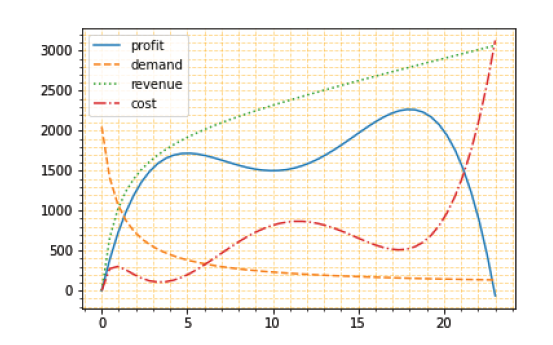

$Π(q)$ has two local maxima at 5 and 18. Minimum is at 10.

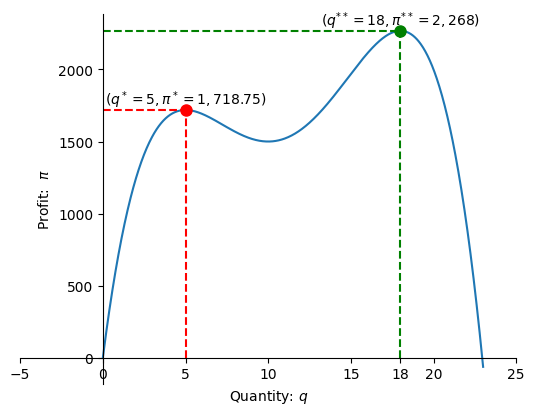

In [29]:
def profit(q):
    return -q**4 / 4 + 11 * q**3 - 160 * q**2 + 900 * q

qs = np.linspace(0, 23, 1000)

#plt.plot(qs, profit(qs))
fig, ax = subplots()
ax.plot(qs, profit(qs))
plt.xlabel('Quantity: $q$')
plt.ylabel('Profit:  $\pi$')
plt.plot([5, 5], [0, profit(5)], linestyle='--', color='r', drawstyle='steps-post')
plt.plot([0, 5], [profit(5), profit(5)], linestyle='--', color='r', drawstyle='steps-post')
plt.plot(5, profit(5), marker='o', markersize=8, color="red")
plt.text(5, profit(5), r'$(q^* = 5, \pi^* = 1,718.75)$', verticalalignment='bottom', horizontalalignment='center', color='black')

plt.plot([18, 18], [0, profit(18)], linestyle='--', color='g', drawstyle='steps-post')
plt.plot([0, 18], [profit(18), profit(18)], linestyle='--', color='g', drawstyle='steps-post')
plt.plot(18, profit(18), marker='o', markersize=8, color="green")
plt.text(18, profit(18), r'$(q^{**} = 18, \pi^{**} = 2,268)$', verticalalignment='bottom', horizontalalignment='center', color='black')
plt.xticks(np.append(plt.xticks()[0], 18))
plt.show()

scipy has problem to find only a local maxima.

In [30]:
from scipy.optimize import minimize_scalar, minimize
def profit(q):
    return -q**4 / 4 + 11 * q**3 - 160 * q**2 + 900 * q

result_min_scalar = minimize_scalar(lambda q: -profit(q))
print(f"{result_min_scalar.message}")
print(f"The maximum according to minimize_scalar is {-result_min_scalar.fun:.2f} \
and achieved at {result_min_scalar.x:.2f}\n")


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol = 1.48e-08 )
The maximum according to minimize_scalar is 1718.75 and achieved at 5.00



Sometimes it even lead to a wrong answer!

In [39]:
x0 = 10
result = minimize(lambda q: -profit(q), x0)
print(f"{result.message}")
print(f"The maximum according to minimize(x0={x0}) is {-result.fun:.2f} at {result.x[0]:.2f}\n")

Optimization terminated successfully.
The maximum according to minimize(x0=10) is 1500.00 at 10.00



# **Getting global maximum with basinhopping**



In [46]:
from scipy.optimize import basinhopping

x0 = 0
# Too few iterations lead to wrong answer.
result = basinhopping(lambda q: -profit(q), x0, niter=10000)

print(f"{result.message}")
print(f"The maximum according to basinhopping(x0={x0}, niter=10000) is {-result.fun:.2f} at {result.x[0]:.2f}\n")

['requested number of basinhopping iterations completed successfully']
The maximum according to basinhopping(x0=0, niter=10000) is 2268.00 at 18.00



# **basinhopping with kwargs and bounds**

In [43]:
from scipy.optimize import basinhopping, NonlinearConstraint

x0 = 0
kwargs = {"constraints": NonlinearConstraint(lambda x: x, lb=0, ub=30)}
result = basinhopping(lambda q: -profit(q), x0, minimizer_kwargs=kwargs)
print(f"{result.message}")
print(f"The maximum according to basinhopping(x0={x0}) is at {result.x[0]:.2f}\n")

['requested number of basinhopping iterations completed successfully']
The maximum according to basinhopping(x0=0) is at 18.00



In [47]:
def profit(q):
	return -q**4 / 4 + 11 * q**3 - 160 * q**2 + 900 * q

x0 = 0

# Define the keyword arguments for bounds
kwargs = {"bounds": [(0, 30)]}

# Run basinhopping to find the optimal quantity
result = basinhopping(lambda q: -profit(q), x0, minimizer_kwargs=kwargs)

print(f"{result.message}")
print(f"The maximum according to basinhopping(x0={x0}) is at {result.x[0]:.2f}\n")

['requested number of basinhopping iterations completed successfully']
The maximum according to basinhopping(x0=0) is at 18.00



# **basinhopping with callback**

Without the `*` operator, `maxima.append(x)` would append the entire tuple `x` to the maxima list.

With the `*` operator, `maxima.append(*x)` appends the elements of `x` to the maxima list individually.

In [49]:
from scipy.optimize import basinhopping, LinearConstraint

x0 = 0
kwargs = {"constraints": LinearConstraint([1], lb=0, ub=30)}
maxima = []

def callback(x, f, accept):
    if accept:
        maxima.append(*x)

result = basinhopping(lambda q: -profit(q), x0, callback=callback, minimizer_kwargs=kwargs, niter=5)

print(f"{result.message}")
print(f"The maximum according to basinhopping(x0={x0}) is at {result.x[0]:.2f}\n")
print(f"(Local) maxima found by basinhopping are: {[round(x, 2) for x in maxima]}")

['requested number of basinhopping iterations completed successfully']
The maximum according to basinhopping(x0=0) is at 18.00

(Local) maxima found by basinhopping are: [5.0, 18.0, 18.0, 18.0, 18.0, 18.0]


### Exercise: *Using callback*

You want to find the two highest maxima of a profit function and you have decided to use callback to collect the optima found and then select the top two values.

First, you will complete the `callback` function. You will check if the value of the objective currently examined by `basinhopping` is accepted as optimum, and if so, you will append it to a list `opt_values`. Afterwards you will run `basinhopping` with the `callback` function you just defined.


In [50]:
opt_values = []

def callback(x, f, accept):
# Check if the candidate is an optimum
    if accept:
# Append the value of the minimized objective to list opt_values
        opt_values.append(f)

# Run basinhopping to find top two maxima
result = basinhopping(lambda q: -profit(q), x0, callback=callback, minimizer_kwargs=kwargs, niter=5, seed=3)
top2 = sorted(list(set([round(f, 2) for f in opt_values])), reverse=True)[:2]
top2 = [-f for f in top2]

print(f"{result.message}\nThe highest two values are {top2}")

['requested number of basinhopping iterations completed successfully']
The highest two values are [1718.75, 2268.0]
